In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.9 MB/s eta 0:00:00


In [3]:
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Accuracy: 0.9153571428571429
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.95      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



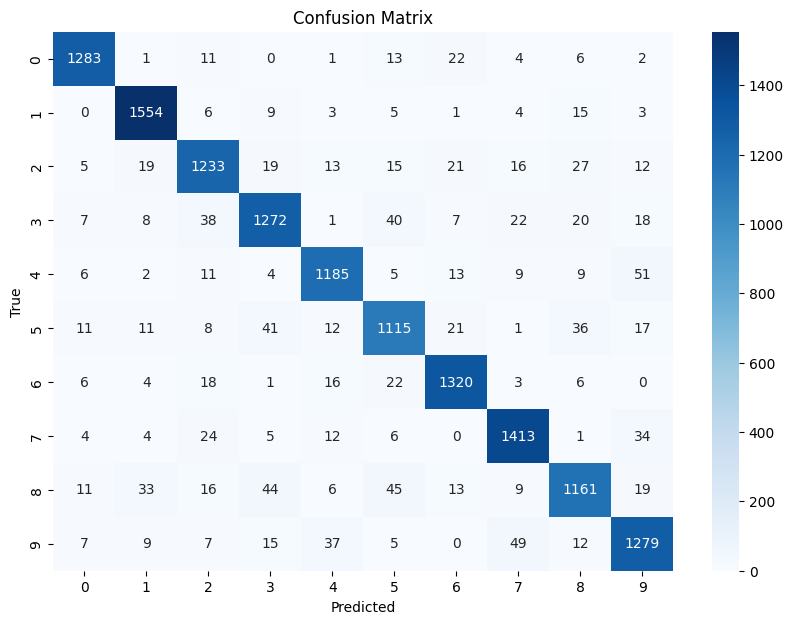

In [4]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load MNIST dataset (already done earlier)
# Flatten and combine the train and test datasets
X = np.concatenate((x_train, x_test), axis=0).reshape(-1, 28*28)
y = np.concatenate((y_train, y_test), axis=0)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [6]:
# 🛠 Create the app.py file inside Colab

%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist

st.title("🖊️ Handwritten Digit Classifier (Logistic Regression)")

# Load data
@st.cache_data
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    X = np.concatenate((x_train, x_test), axis=0).reshape(-1, 28*28)
    y = np.concatenate((y_train, y_test), axis=0)
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = load_data()

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

st.write(f"🎯 Accuracy: {acc:.4f}")

# Confusion Matrix
fig, ax = plt.subplots()
sns.heatmap(
    pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']),
    annot=True, fmt='d', cmap='Blues', ax=ax
)
st.pyplot(fig)


Writing app.py
